<a href="https://colab.research.google.com/github/Kaustav9820/Kaustav9820/blob/main/DecisionTree_classification_spam_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
 
uploaded = files.upload()
 
for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving spam.csv to spam.csv
User uploaded file "spam.csv" with length 503663 bytes


In [2]:
import io
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import numpy as np
import seaborn as sns

In [5]:
df=pd.read_csv(io.BytesIO(uploaded['spam.csv']),encoding="latin-1")
df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [7]:
df=df.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis=1)

In [8]:
df.columns=['spam','Messages']
df

,spam,Messages
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [9]:
le=LabelEncoder ()
df['spam']=(le.fit_transform(df['spam']))
df=pd.DataFrame(df)
df

,spam,Messages
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will Ì_ b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


In [10]:
Y=df['spam']
X=df.drop('spam',axis=1)

In [13]:
X_train,X_test, y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=0)
ve=CountVectorizer ()
X_count=ve.fit_transform(X_train.Messages.values)
tree=DecisionTreeClassifier ()
tree.fit(X_count,y_train)
yp=tree.predict(X_count)
X_test_n=ve.transform(X_test.Messages.values)
yp1=tree.predict(X_test_n)

In [15]:
accuracy_score(yp,y_train)

1.0

In [16]:
accuracy_score(yp1,y_test)

0.9650224215246637

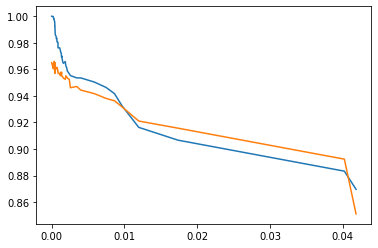

In [17]:
path=tree.cost_complexity_pruning_path(X_count,y_train)
alphas=path['ccp_alphas']
accuracy_train,accuracy_test=[],[]
for i in alphas:
  tree=DecisionTreeClassifier(ccp_alpha=i)
  tree.fit(X_count,y_train)
  yp=tree.predict(X_count)
  yp1=tree.predict(X_test_n)
  accuracy_train.append(accuracy_score(yp,y_train))
  accuracy_test.append(accuracy_score(yp1,y_test))
sns.lineplot(y=accuracy_train,x=alphas)
sns.lineplot(y=accuracy_test,x=alphas)